In [1]:
1# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../stock_exchange"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fundamentals.csv
prices.csv
prices-split-adjusted.csv
securities.csv
stock_prediction.ipynb



In [2]:
df=pd.read_csv('../stock_exchange/prices.csv')
df.tail()
df=df.loc[df['symbol'] == 'CSCO']
print(df.tail(8))

              date symbol       open      close        low       high  \
847374  2016-12-20   CSCO  30.830000  30.559999  30.459999  30.870001   
847874  2016-12-21   CSCO  30.690001  30.420000  30.410000  30.690001   
848374  2016-12-22   CSCO  30.400000  30.459999  30.250000  30.480000   
848874  2016-12-23   CSCO  30.540001  30.530001  30.400000  30.600000   
849374  2016-12-27   CSCO  30.639999  30.680000  30.600000  30.820000   
849874  2016-12-28   CSCO  30.700001  30.420000  30.350000  30.770000   
850374  2016-12-29   CSCO  30.370001  30.459999  30.330000  30.549999   
850874  2016-12-30   CSCO  30.559999  30.219999  30.129999  30.600000   

            volume  
847374  17475200.0  
847874  14488900.0  
848374  12935800.0  
848874   9167500.0  
849374  14175500.0  
849874  12022200.0  
850374  10995600.0  
850874  20190000.0  


In [3]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import math

/home/nishu/kerai/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

18
            date symbol       open      close        low       high  \
356   2010-01-04   CSCO  24.110001  24.690001  24.010000  24.840000   
824   2010-01-05   CSCO  24.600000  24.580000  24.379999  24.730000   
1292  2010-01-06   CSCO  24.540001  24.420000  24.340000  24.740000   
1760  2010-01-07   CSCO  24.299999  24.530001  24.170000  24.570000   
2228  2010-01-08   CSCO  24.379999  24.660000  24.250000  24.700001   

          volume      label  
356   59853700.0  22.469999  
824   45124500.0  22.730000  
1292  35715700.0  23.020000  
1760  31531200.0  23.070000  
2228  39115900.0  23.160000  


In [5]:
#X = np.array(df.drop(['label'], 1))

X=np.array(df.drop(['label','symbol','date'], axis=1))
#print(X)
X = preprocessing.scale(X)
#print(X)
X_lately = X[-forecast_out:]
#print(X_lately)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [6]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.8936355090692591


[29.08862329 29.75535116 29.76134277 29.7405606  29.83066432 30.27226707
 30.3458063  30.31031276 30.1056798  30.44315366 30.32134739 30.16087133
 30.14365937 30.23755764 30.37556232 30.24727211 30.18256153 30.01954925]
2016-12-05 00:00:00
1480914000.0
2016-12-06 00:00:00
                    date symbol  open  close  low  high  volume  label  \
2016-12-20 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-21 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-22 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-23 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-24 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                      Forecast  
2016-12-20 00:00:00  30.237558  
2016-12-21 00:00:00  30.375562  
2016-12-22 00:00:00  30.247272  
2016-12-23 00:00:00  30.182562  
2016-12-24 00:00:00  30.019549  


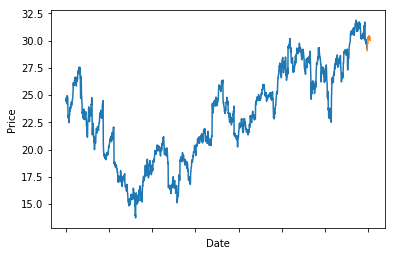

In [7]:
import time
forecast_set = clf.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
last_date=dt.strptime(last_date, '%Y-%m-%d')
#timestamp = time.mktime(time_123)
#a=repr(last_date)
dt_1 = dt1.datetime(last_date.year, last_date.month, last_date.day, 0, 0)
print (dt_1)
k = time.mktime(dt_1.timetuple())
print k

#time.mktime(dt.timetuple())
dt_2 = dt.fromtimestamp(86400)

one_day =time.mktime(dt_2.timetuple())
next_unix = dt.fromtimestamp(k + one_day) 
print next_unix
for i in forecast_set:
    next_u=time.mktime(next_unix.timetuple())
    #next_date = dt.fromtimestamp(next_u)
    next_u += 86400
    next_unix = dt.fromtimestamp(next_u)
    df.loc[next_unix] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())
df['close'].plot()
df['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
